In [26]:
# pandas for data structures and operations for manipulating numerical tables and time series
import pandas
from pandas.plotting import scatter_matrix

# matplotlib.pyplot for data plots
import matplotlib.pyplot as plt

#
import seaborn as sns

# sklearn for machine learning methods
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# for numeric calculations
import numpy as np

# from utilities import visualize_classifier

#
import warnings
warnings.filterwarnings('ignore')


In [27]:
df = pandas.read_csv("/Users/cej12/Skrivebord/Untitled Folder/data/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [28]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [29]:
#make a new variable 
dataset_new = df
dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN) 

# Count of NaN
dataset_new.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [30]:
# Replacing NaN with mean values
dataset_new["Glucose"].fillna(dataset_new["Glucose"].mean(), inplace = True)
dataset_new["BloodPressure"].fillna(dataset_new["BloodPressure"].mean(), inplace = True)
dataset_new["SkinThickness"].fillna(dataset_new["SkinThickness"].mean(), inplace = True)
dataset_new["Insulin"].fillna(dataset_new["Insulin"].mean(), inplace = True)
dataset_new["BMI"].fillna(dataset_new["BMI"].mean(), inplace = True)

# Count of NaN
dataset_new.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [31]:
dataset_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


In [32]:
# better way of cleaning incorrect null values
lst=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in lst:
    df[i].replace(0, np.nan, inplace=True)
    df[i].fillna(df[i].median(), inplace=True)

In [33]:
# Convert the dataset into array
array = dataset_new.values

In [34]:
# Create two (sub) arrays from it
# X - features, all rows, all columns but the last one
# y - labels, all rows, the last column
X, y = array[:, :-1], array[:, -1]


#X = df.drop("Outcome", axis=1)
#y = df["Outcome"]
#X.values

In [35]:
# Separate input data into classes based on labels
class0 = np.array(X[y==0]) # all the data from the ones without diabetes
class1 = np.array(X[y==1]) # all the data from the ones with diabetes

In [36]:
# Split the dataset into into training and testing sets in proportion 8:2 
#   80% of it as training data
#   20% as a validation dataset
set_prop = 0.2
#  Initialize seed parameter for the random number generator used for the split
seed = 7

In [37]:
# Split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=set_prop, random_state=seed)

In [38]:
# Build Decision Trees Classifier 
params = {'max_depth': 5}
classifier = DecisionTreeClassifier(**params)
# classifier = RandomForestClassifier(n_estimators = 100, max_depth = 6)

In [39]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [40]:
# draw tree from the trained data by graphviz package
import graphviz
dot_data = tree.export_graphviz(classifier, out_file=None, 
                         feature_names=dataset_new.columns[:8], class_names = True,        
                         filled=True, rounded=True, proportion = False,
                         special_characters=True)  
graph = graphviz.Source(dot_data) 

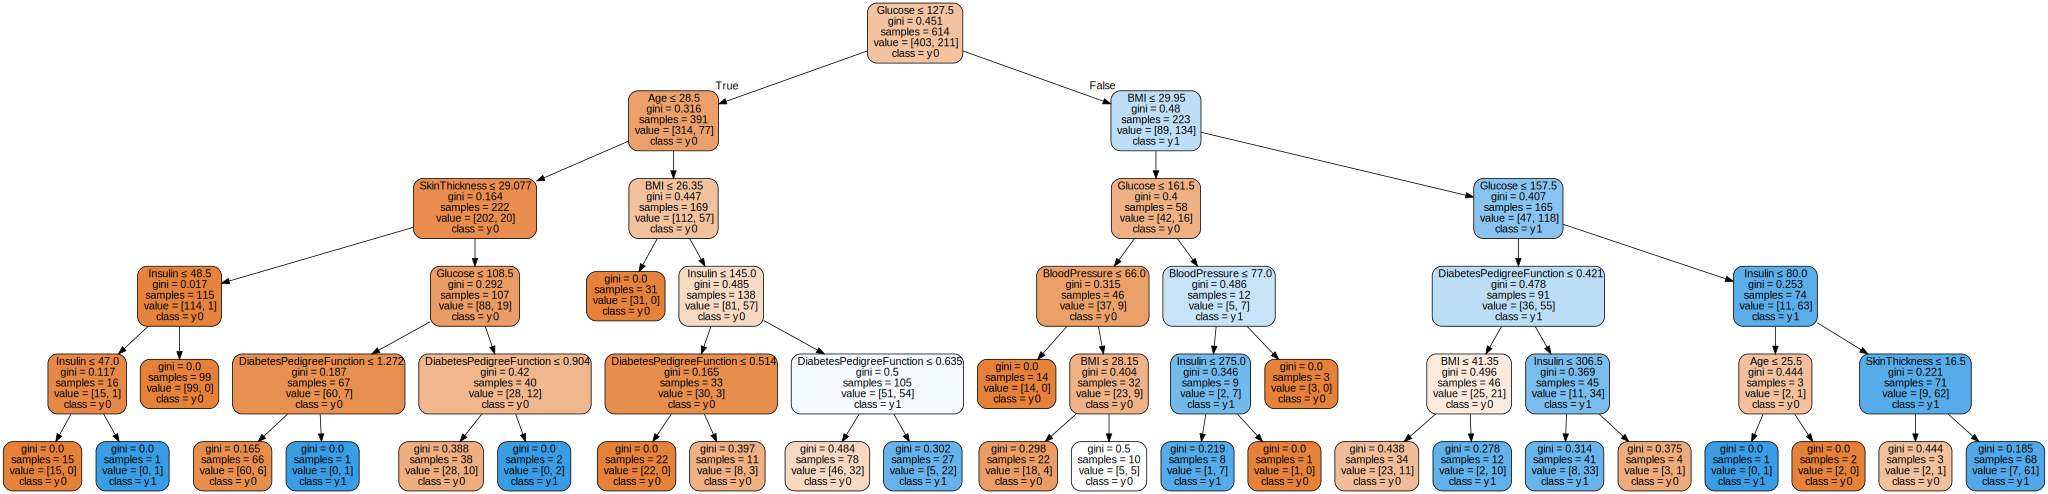

In [41]:
# show it here
graph 

In [58]:
# Predict the labels of the test data
y_testp = classifier.predict(X_test)
y_testp

array([0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0.])

In [43]:
# Calculated the accuracy of the model comparing the observed data and predicted data
print ("Accuracy is ", accuracy_score(y_test,y_testp))

Accuracy is  0.7792207792207793


In [44]:
# Create confusion matrix
confusion_mat = confusion_matrix(y_test,y_testp)
confusion_mat

array([[90,  7],
       [27, 30]], dtype=int64)

In [45]:
confusion = pandas.crosstab(y_test,y_testp)
confusion

col_0,0.0,1.0
row_0,,
0.0,90,7
1.0,27,30


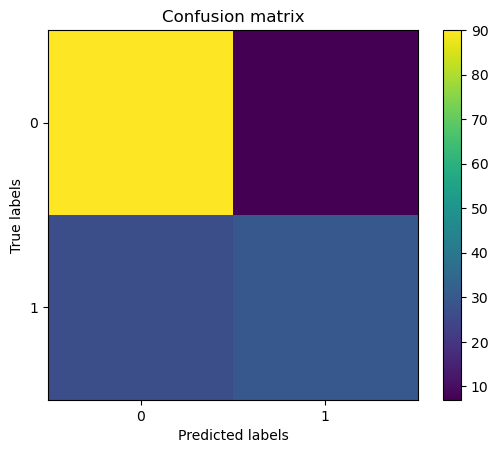

In [46]:
# Visualize confusion matrix
plt.imshow(confusion_mat, interpolation='nearest')
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(2)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

<Axes: >

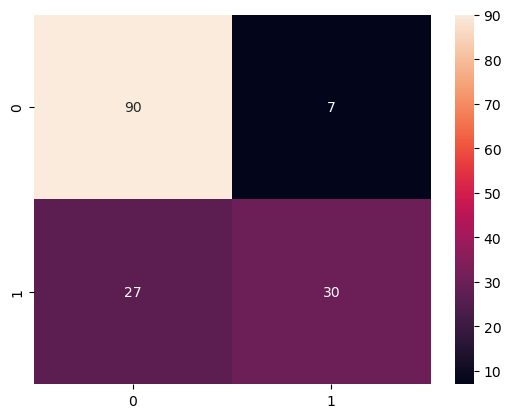

In [47]:
import seaborn as sns
sns.heatmap(confusion_mat, annot=True)

In [63]:
class_names = ['no-diabetes', 'diabetes']
# Classifier performance on training dataset
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))

              precision    recall  f1-score   support

 no-diabetes       0.84      0.94      0.89       403
    diabetes       0.86      0.65      0.74       211

    accuracy                           0.84       614
   macro avg       0.85      0.80      0.81       614
weighted avg       0.85      0.84      0.84       614



In [61]:
# Classifier performance on test dataset
print(classification_report(y_test, classifier.predict(X_test), target_names=class_names))

              precision    recall  f1-score   support

 no-diabetes       0.77      0.93      0.84        97
    diabetes       0.81      0.53      0.64        57

    accuracy                           0.78       154
   macro avg       0.79      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



In [57]:
t = df.shape[1]
t1 = t - 1
t1



8

In [52]:
df.columns[:8]

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [129]:
testdata = pandas.read_csv("/Users/cej12/Skrivebord/Untitled Folder/data/testy.csv")
testdata

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50


In [130]:
test_array = testdata.values
test_array

array([[  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
         50.   ]])

In [131]:
# Predict the labels of the test data
test_predict = classifier.predict(test_array)
test_predict

array([1.])

In [132]:
test = ['6','148','72','35','155.548','33.6','50']

In [135]:
test

['6', '148', '72', '35', '155.548', '33.6', '50']